In [9]:
import numpy as np

In [10]:
volume_filepath = '../data/stdata12/stdata_12_amplitude.npy'
label_filepath = '../data/stdata12/stdata_12_labels.npy'

In [11]:
volume_npy = np.load(volume_filepath)
label_npy = np.load(label_filepath)

In [12]:
volume_npy.shape

(4, 951, 463)

In [13]:
train_amplitude_npy = volume_npy[ :2, :, : ]
train_labels_npy = label_npy[:2, : , :]

val_amplitude_npy = volume_npy[ 2, :, : ]
val_labels_npy = label_npy[2, : , :]

test_amplitude_npy = volume_npy[ 3, :, : ]
test_labels_npy = label_npy[3, : , :]

In [ ]:
np.save('../data/stdata12/train_amplitude.npy', train_amplitude_npy)
np.save('../data/stdata12/train_labels.npy',train_labels_npy)
np.save('../data/stdata12/val_amplitude.npy',val_amplitude_npy)
np.save('../data/stdata12/val_labels.npy',val_labels_npy)
np.save('../data/stdata12/test_amplitude.npy',test_amplitude_npy)
np.save('../data/stdata12/test_labels.npy',test_labels_npy)

In [ ]:
# normalising the data to 99th percentile of abs_max and clipping to abs_max 
abs_max = abs(volume).max()
volume_norm = volume.clip(-abs_max, abs_max) / abs_max
volume_norm

<xarray.Dataset>
Dimensions:  (iline: 4, xline: 951, twt: 463)
Coordinates:
  * iline    (iline) uint16 190 290 390 490
  * xline    (xline) uint16 300 301 302 303 304 305 ... 1246 1247 1248 1249 1250
  * twt      (twt) float64 0.0 4.0 8.0 12.0 ... 1.84e+03 1.844e+03 1.848e+03
    cdp_x    (iline, xline) float32 6.058e+05 6.058e+05 ... 6.293e+05 6.293e+05
    cdp_y    (iline, xline) float32 6.076e+06 6.076e+06 ... 6.084e+06 6.084e+06
Data variables:
    data     (iline, xline, twt) float32 0.0 0.0 0.0 ... 0.3015 0.2574 0.06618

In [ ]:
# First inline: 190    Last inline: 490
# First xline:  300    Last xline:  1250

# converting data to numpy array 
volume_npy = volume_norm.data.to_numpy()
labels_npy = label.data.to_numpy()

In [ ]:
# writing numpy files to disk 
np.save('stdata_12_amplitude.npy', volume_npy)
np.save('stadata_12_labels.npy', labels_npy)

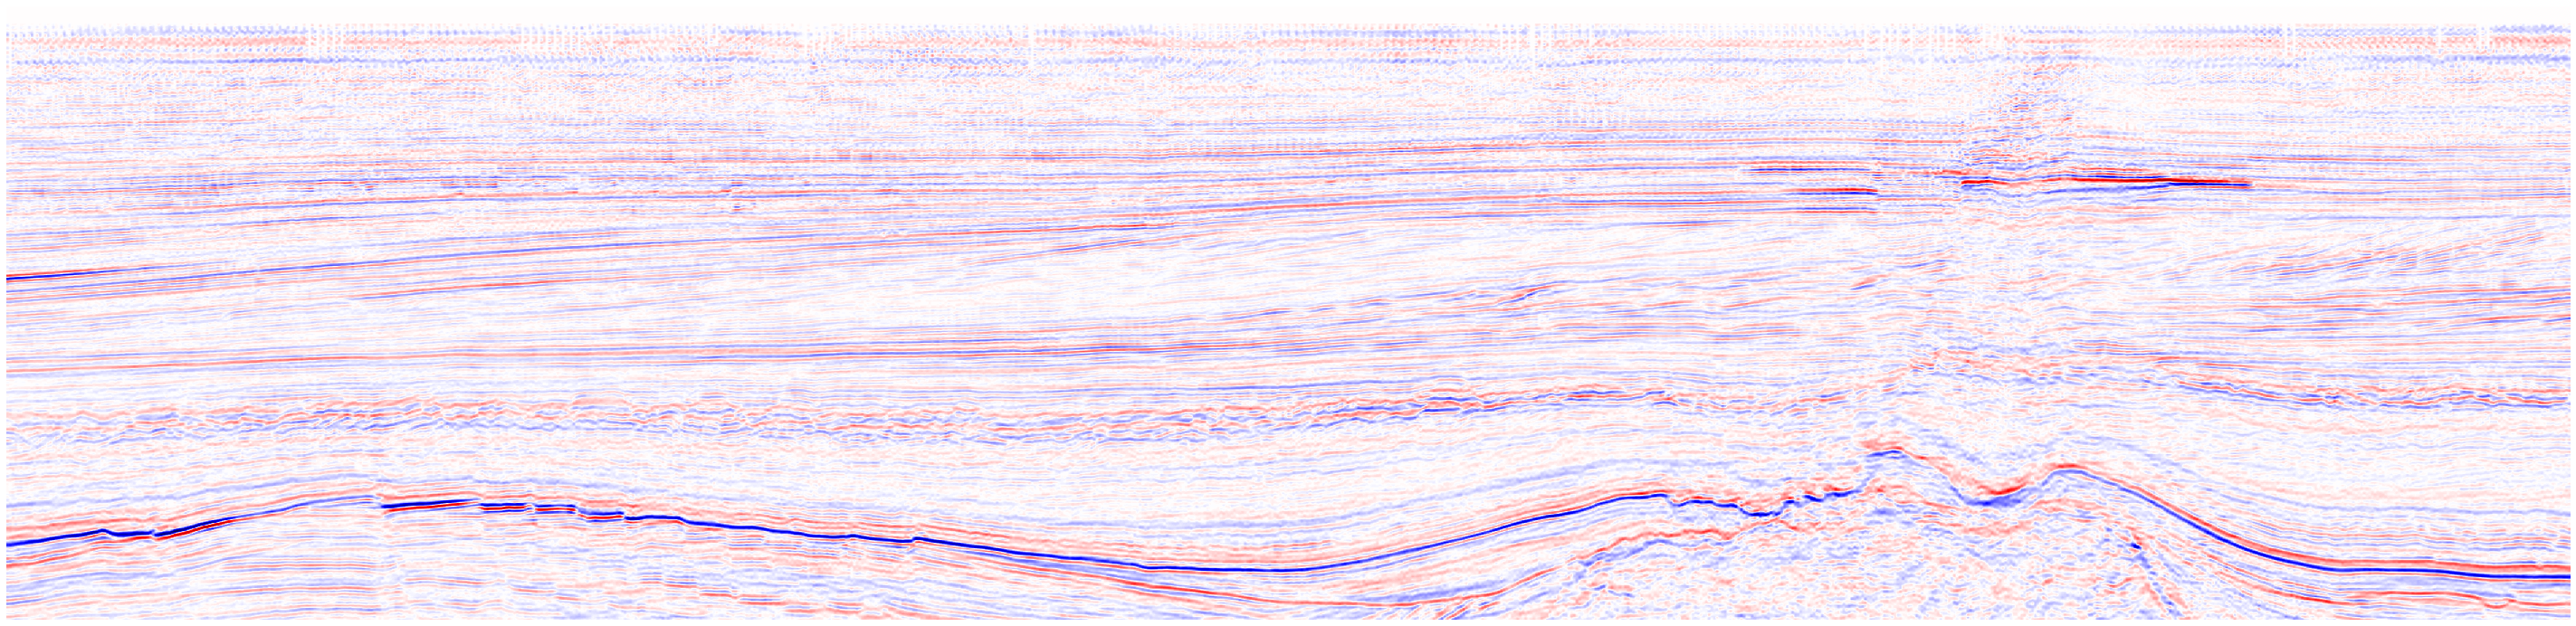

In [ ]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(40,10))
plt.imshow(volume_npy[0].T, cmap='seismic', vmin= - 1, vmax = 1, aspect='auto')
plt.tight_layout()
plt.axis('off')
plt.show()

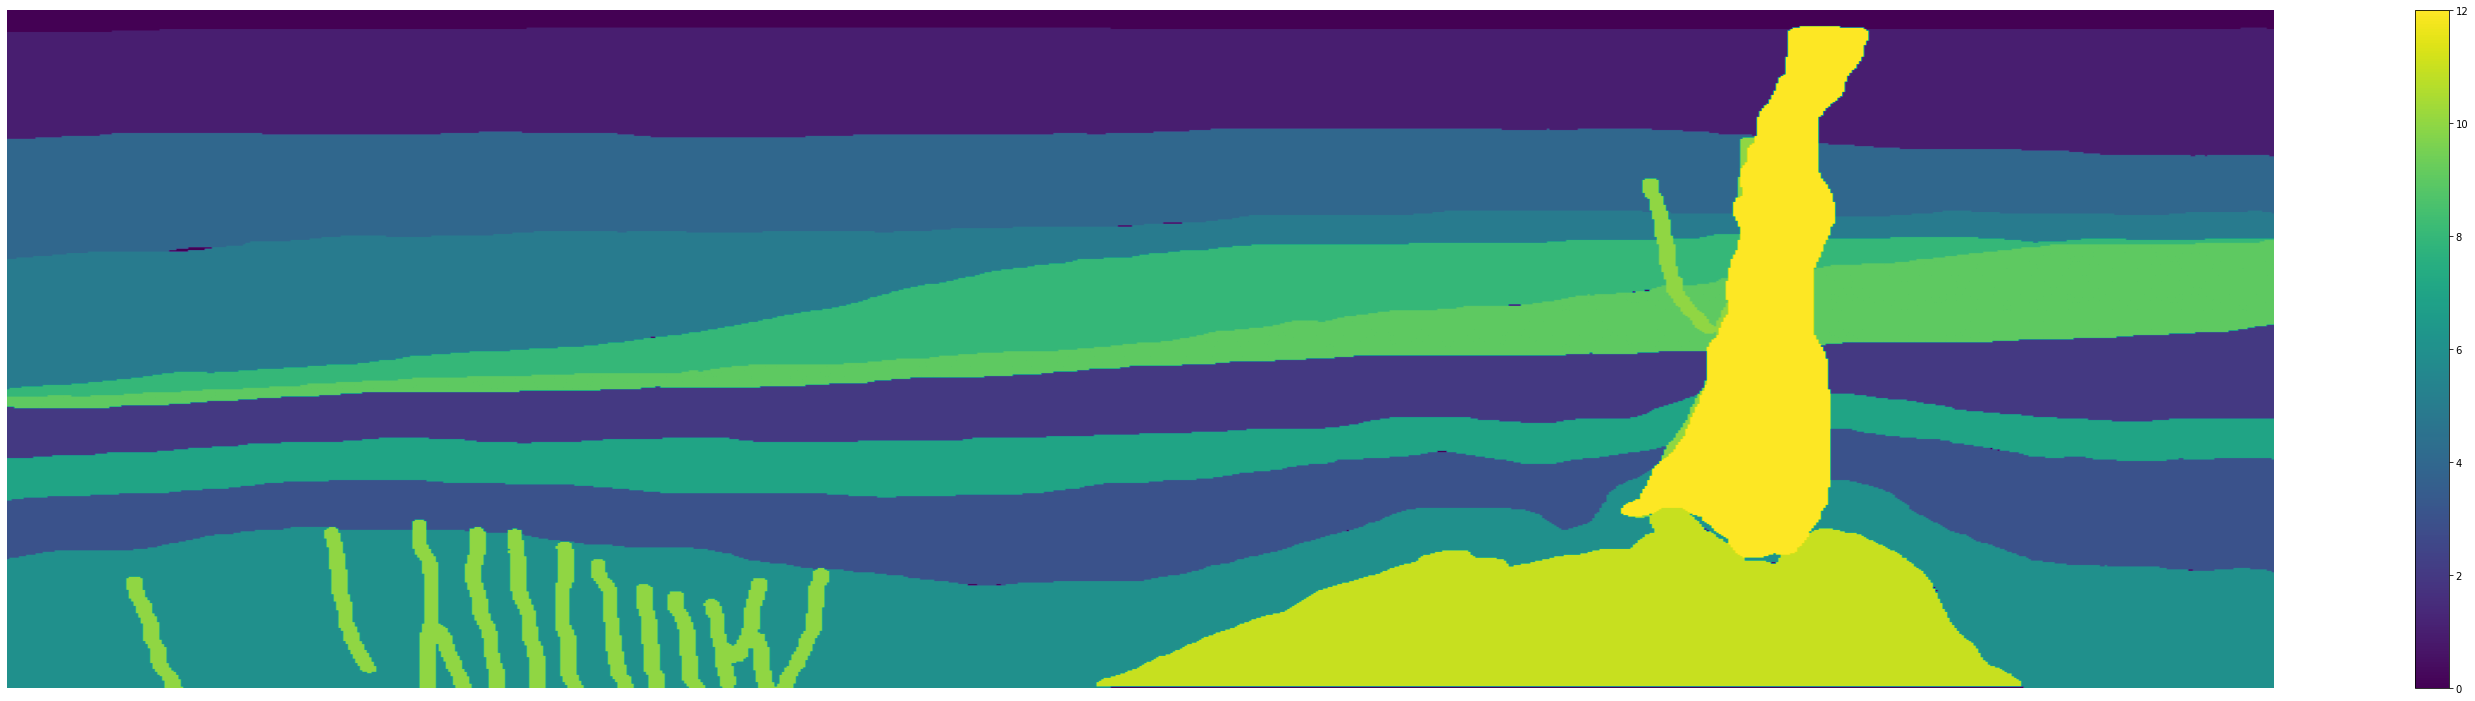

In [ ]:
# sample labels 
plt.figure(figsize=(40,10))
plt.imshow(labels_npy[0].T,aspect='auto')
plt.colorbar()
plt.tight_layout()
plt.axis('off')
plt.show()

Class label :0.0 Count : 43520
Class label :1.0 Count : 280349
Class label :2.0 Count : 146730
Class label :3.0 Count : 139530
Class label :4.0 Count : 190226
Class label :5.0 Count : 128714
Class label :6.0 Count : 237106
Class label :7.0 Count : 197457
Class label :8.0 Count : 132205
Class label :9.0 Count : 161203
Class label :10.0 Count : 21849
Class label :11.0 Count : 62387
Class label :12.0 Count : 19976


Text(0.5, 1.0, 'Distribution of Labels')

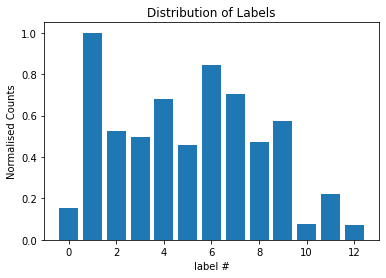

In [ ]:
# Distribution of class labels 

labels = np.unique(labels_npy).tolist()
labels

counts = []
for label in labels : 
    count = labels_npy[labels_npy == label].shape[0]
    print(f'Class label :{label}','Count :', count )
    counts.append(count)
    
normalised_counts = [x / max(counts) for x in counts]
plt.bar(labels, normalised_counts, )
plt.xlabel('label #')
plt.ylabel('Normalised Counts')
plt.title("Distribution of Labels")

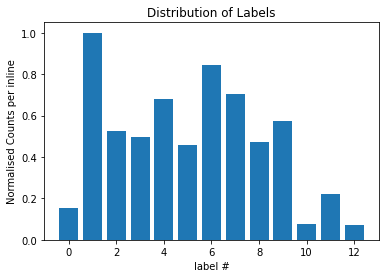

In [ ]:
# Mean Distribution of classes in an a typical inline ( class coverage )
# i.e total count by inline image size 
mean_counts_inline = [x / volume_npy.shape[0] / volume_npy.shape[1] for x in counts ]
mean_counts_inline_normalised = [ x / max(mean_counts_inline) for x in mean_counts_inline]

plt.bar(labels, mean_counts_inline_normalised, )
plt.xlabel('label #')
plt.ylabel('Normalised Counts per inline')
plt.title("Distribution of Labels");

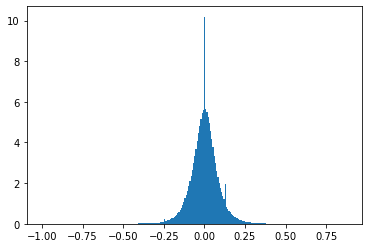

In [ ]:
# distrbution of data 
plt.figure('Data Probability Distribution')
plt.hist(volume_npy.reshape(-1), bins=250,density=True)
plt.show()

(4, 951, 463) [0. 1.]


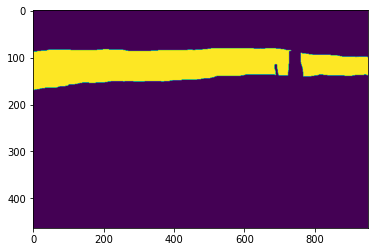

In [ ]:
# selecting data of each class 
from copy import deepcopy 

def class_mask(label_npy, label) :
    label_npy = deepcopy(label_npy)
    condition = (label_npy == label)
    label_npy[condition] = 1 
    label_npy[~condition] = 0
    return label_npy

# sample plot 

label = 4

label_mask = class_mask(labels_npy, label)
print(label_mask.shape,np.unique(label_mask))
plt.imshow(label_mask[0].T, aspect='auto')

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0]

(43520,)

(280349,)

(146730,)

(139530,)

(190226,)

(128714,)

(237106,)

(197457,)

(132205,)

(161203,)

(21849,)

(62387,)

(19976,)

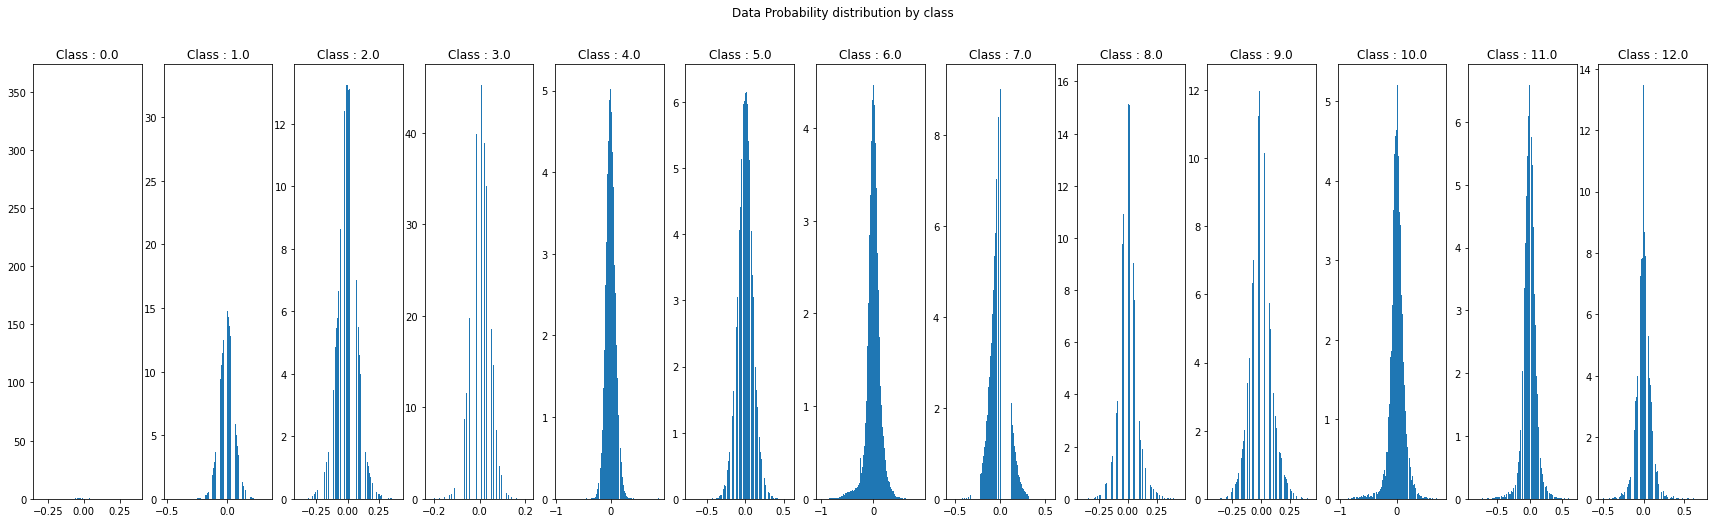

In [ ]:
# distribution of data in each class

# data filtered by class 
label = 2
def data_by_class(volume_npy, label_npy, label) : 
    label_mask = class_mask(labels_npy, label)
    positions = np.where(label_mask == 1)
    return volume_npy[positions]

# data distribution by class
display(labels)
fig, ax = plt.subplots(ncols=len(labels), figsize=(30,8))
for i,label in enumerate(labels) : 
    volume = data_by_class(volume_npy, labels_npy, label)
    ax[i].hist(volume.tolist(), bins=250, density=True)
    ax[i].set_title(f'Class : {label}')


plt.suptitle('Data Probability distribution by class')

plt.show()

In [3]:
# Train, test , val split 
display(volume_npy.shape)

NameError: name 'volume_npy' is not defined